In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#from __future__ import print_function
%matplotlib inline

#from __future__ import print_function
import patsy
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.regression.quantile_regression import QuantReg
import pandas as pd
var = pd.read_csv("/content/drive/My Drive/VantageAgora/Sample2.CSV",encoding = "ISO-8859-1")
df = pd.DataFrame(var)
df1 = pd.DataFrame(var)
#df = df[df.INCURRED != 0]
df = df[df.VEHYEAR != 0]
df = df[df.CGENDER != " "]
df = df[df.LOCSTATE != 0]
df = df[df.DRIVERAGE != 0]
df = df[df.DRIVERAGE != '*']


mod = smf.quantreg('INCURRED ~ VEHYEAR + CGENDER', df)
res = mod.fit(q=.5)
print(res.summary())

#print(df['DRIVERAGE'])
#print(df['INCURRED'].isna().sum()) 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,7,20,32,33,63,91,125,126,127,128,130,133,136,139,145) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


                         QuantReg Regression Results                          
Dep. Variable:               INCURRED   Pseudo R-squared:             0.002064
Model:                       QuantReg   Bandwidth:                   2.264e+05
Method:                 Least Squares   Sparsity:                    1.441e+06
Date:                Tue, 09 Apr 2019   No. Observations:                 3199
Time:                        05:52:34   Df Residuals:                     3195
                                        Df Model:                            3
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -8.009e+06   3.32e+06     -2.416      0.016   -1.45e+07   -1.51e+06
CGENDER[T.M] -4.128e+04    2.8e+04     -1.472      0.141   -9.63e+04    1.37e+04
CGENDER[T.U] -1.676e+05   3.82e+04     -4.390      0.000   -2.42e+05   -9.27e+04
VEHYEAR       4188.0976   1653.708      2.

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


[35.7 68.8 99.9]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


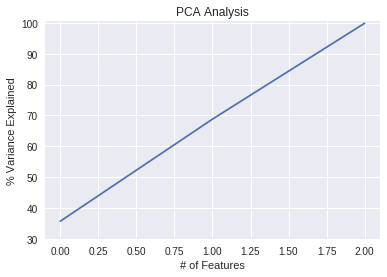

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sb
%matplotlib inline

#df = df[df.INDPAID != 0]
#df = df[df.TOTALPAID != 0]


df1.replace([np.inf, -np.inf], np.nan) #convert infs to nans
df1 = df1.dropna(how = 'any') #remove nans
df2= df[['INCURRED','VEHYEAR','DRIVERAGE']] #keep only numeric features

#print(df2)
x = df2.values #convert the data into a numpy array
x = scale(x);x
covar_matrix = PCA(n_components = 3) 
covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
print(var)

#plot the percentage of variance
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)


[ 66.5  99.8 100. ]


C:\Users\aniru\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


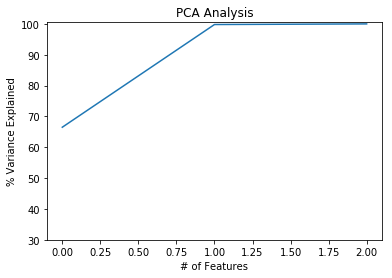

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sb
%matplotlib inline

df1.replace([np.inf, -np.inf], np.nan) #convert infs to nans
df1 = df1.dropna(how = 'any') #remove nans
df2= df[['INCURRED','TOTALPAID','RECOVERIES']] #keep only numeric features

#print(df2)
x = df2.values #convert the data into a numpy array
x = scale(x);x
covar_matrix = PCA(n_components = 3) 
covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
print(var)

#plot the percentage of variance
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)


In [0]:
from __future__ import print_function
%matplotlib inline

#from __future__ import print_function
import patsy
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.regression.quantile_regression import QuantReg
import pandas as pd
var = pd.read_csv(r"Sample2.csv",encoding = "ISO-8859-1")
df2 = pd.DataFrame(var)
#print(df)


mod = smf.quantreg('INCURRED ~ TOTALPAID + INDPAID + ANATOMY + NCCI_NOI + NCCI_SOI + NET_INDEMNITY_RESERVE + CGENDER + NET_EXPENSE_RESERVE + YORKPAID + LOCSTATE + VEHYEAR + DIVNUM',df2)#+ EXPPAID + ANATOMY + NCCI_NOI + NCCI_SOI +LSTATE + TOTALRESERVES+ NET_INDEMNITY_RESERVE + INDRESERVES + CGENDER+ NET_EXPENSE_RESERVE + EXPRESERVES + YORKPAID + LOCSTATE + VEHYEAR + DIVNUM',df2)
res = mod.fit(q=.5)
print(res.summary())



C:\Users\aniru\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:               INCURRED   Pseudo R-squared:                1.000
Model:                       QuantReg   Bandwidth:                   4.716e-05
Method:                 Least Squares   Sparsity:                    0.0003480
Date:                Thu, 21 Mar 2019   No. Observations:                43963
Time:                        17:23:04   Df Residuals:                    43896
                                        Df Model:                           66
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0002   1.81e-06   -103.278      0.000      -0.000      -0.000
CGENDER[T.F]              0.0006   4.23e-06    130.137      0.000       0.001       0.001
CGENDER[T.M]             -0.0008   4.03e-06   -193.471      0.000      -0.001      -0.0

In [0]:
"""
The 20 columns with the highest corelation are as follows:
Index(['INCURRED', 'TOTALPAID', 'INDPAID', 'EXPPAID', 'DaysToProcess',
       'ANATOMY', 'NCCI_NOI', 'NCCI_SOI', 'LSTATE', 'TOTALRESERVES',
       'NET_INDEMNITY_RESERVE', 'INDRESERVES', 'CGENDER',
       'NET_EXPENSE_RESERVE', 'EXPRESERVES', 'YORKPAID', 'DaysToIssue',
       'LOCSTATE', 'VEHYEAR', 'DIVNUM'],
      dtype='object')


"""

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sb
%matplotlib inline

df2= df[['TOTALPAID', 'INDPAID', 'EXPPAID','ANATOMY', 'NCCI_NOI', 'NCCI_SOI', 'TOTALRESERVES',
       'NET_INDEMNITY_RESERVE', 'INDRESERVES','NET_EXPENSE_RESERVE', 'EXPRESERVES', 'YORKPAID','VEHYEAR', 'DIVNUM',
        'RECOVERIES','MEDPAID','MEDRESERVES','WEEKLYWAGE','NCCI_SEV','CLNTNO','IEFFDT']] #keep only numeric features
#print(df2)
# 'LSTATE'
#'CGENDER'
#'LOCSTATE'
#print(df2)
x = df2.values #convert the data into a numpy array
x = scale(x);x
covar_matrix = PCA(n_components = 21) 
covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
print(var)


[ 24.   39.7  52.1  61.2  68.1  74.6  80.4  85.9  90.4  94.2  97.5  99.2
 100.  100.  100.  100.  100.  100.  100.  100.  100. ]


C:\Users\aniru\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [0]:
df_numerics_only = df.select_dtypes(include=[np.number])
#print(df_numerics_only)
df_numerics_only.columns

Index(['CLNTNO', 'NET_INDEMNITY_RESERVE', 'NET_EXPENSE_RESERVE', 'LOSSDATE',
       'OPENDATE', 'CLOSEDATE', 'REOPENDATE', 'ANATOMY', 'IEFFDT', 'IEXPDT',
       'LOCTXTCODE', 'DIVNUM', 'DIVTXTCODE', 'SUITRECEIVED',
       'APPARENTSERVICEDATE', 'SUITASSIGNED', 'STIPDATE', 'DCTAXID', 'DCPHONE',
       'DCFAX', 'IPHONE', 'IWORKPHONE', 'LTAXID', 'LPHONE', 'LFAX', 'DNAME',
       'DTAXID', 'DADDR1', 'DADDR2', 'DCITY', 'DZIP', 'DPHONE', 'DFAX',
       'VEHYEAR', 'EMPLSTATUS', 'EMPLSTATUSDESC', 'EMPLSTATUS_NCCI', 'DOB',
       'DATEOFHIRE', 'NCCI_NOI', 'NCCI_SOI', 'NCCI_SEV', 'JOBCODE', 'JOBTITLE',
       'CLASSCODE', 'CLASSCODE_DESCR', 'DATEINITIA', 'DATERETURN',
       'DATEREPORT', 'WEEKLYWAGE', 'INDRESERVES', 'MEDRESERVES', 'EXPRESERVES',
       'TOTALRESERVES', 'INDPAID', 'MEDPAID', 'EXPPAID', 'YORKPAID',
       'TOTALPAID', 'RECOVERIES', 'INCURRED', 'AWM_1st_Deducible_Notice',
       'AWM_Deductible_Verifies?', 'AWM_Hazen_CC#',
       'AWM_Owner_Retained_Salvage_Amount', 'AWM_TF_Final_

In [0]:
from __future__ import print_function
%matplotlib inline

#from __future__ import print_function
import patsy
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.regression.quantile_regression import QuantReg
import pandas as pd
var = pd.read_csv(r"Sample2.csv",encoding = "ISO-8859-1")
df2 = pd.DataFrame(var)
#print(df)
df2 = df2[df2.DRIVERAGE != '*']
df2['DRIVERAGE'] = pd.to_numeric(df2['DRIVERAGE'])
#is_numeric_dtype(df2['DRIVERAGE'])

mod = smf.quantreg('INCURRED ~ CGENDER + LOCSTATE + VEHYEAR + DRIVERAGE',df2)#+ EXPPAID + ANATOMY + NCCI_NOI + NCCI_SOI +LSTATE + TOTALRESERVES+ NET_INDEMNITY_RESERVE + INDRESERVES + CGENDER+ NET_EXPENSE_RESERVE + EXPRESERVES + YORKPAID + LOCSTATE + VEHYEAR + DIVNUM',df2)
res = mod.fit(q=.5)
print(res.summary())





                         QuantReg Regression Results                          
Dep. Variable:               INCURRED   Pseudo R-squared:              0.01051
Model:                       QuantReg   Bandwidth:                   4.649e+04
Method:                 Least Squares   Sparsity:                    7.356e+05
Date:                Fri, 22 Mar 2019   No. Observations:                43961
Time:                        11:19:29   Df Residuals:                    43902
                                        Df Model:                           58
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.672e+05   5.01e+04      3.337      0.001     6.9e+04    2.65e+05
CGENDER[T.F]    1.974e+05   8101.785     24.361      0.000    1.81e+05    2.13e+05
CGENDER[T.M]    1.595e+05   7465.246     21.361      0.000    1.45e+05    1.74e+05
CGENDER[T.U]    1.103e+04   1.19

C:\Users\aniru\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sb
%matplotlib inline

df2= df2[['INCURRED', 'ANATOMY', 'NCCI_NOI','NCCI_SOI','VEHYEAR', 'DRIVERAGE', 'RECOVERIES','DIVNUM','INDPAID']] #keep only numeric features
#print(df2)
# 'LSTATE'
#'CGENDER'
#'LOCSTATE'
#print(df2)
x = df2.values #convert the data into a numpy array
x = scale(x);x
covar_matrix = PCA(n_components = 9) 
covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
print(var)


KeyError: "['INDPAID'] not in index"